In [2]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib as matplot
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import requests
import json
from datetime import datetime
import seaborn as sns

In [48]:
# Load second Dataset with Corona Cases
payload = {"code": "ALL"}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))
df_covid = pd.DataFrame.from_dict(json.loads(response.text))
# df_covid = df_covid[df_covid['code'] == 'US']

# convert index to date column
df_covid["Date"] = pd.to_datetime(df_covid["date"])

# delete some columns that we won't use
df_covid.drop(
    ["day", "month", "year", "country", "code", "population", "date"],
    axis=1,
    inplace=True,
)

# Summarize cases over all countries
df_covid = df_covid.groupby(["Date"]).sum()

# Read the data for different assets
today_date = datetime.today().strftime("%Y-%m-%d")
start_date = "2020-01-01"
data_source = "yahoo"
asset_list = [
    ("SP500", "^GSPC"),
    ("DAX", "DAX"),
    ("N225", "^N225"),
    ("SP500FutJune20", "ES=F"),
    ("LUFTHANSA", "LHA.DE"),
    ("AmericanAirlines", "AAL"),
    ("BTCUSD", "BTC-USD"),
    ("ETHUSD", "ETH-USD"),
    ("Oil", "CL=F"),
    ("Gold", "GC=F"),
    ("Soybean", "SM=F"),
    ("UsTreasuryBond", "ZB=F"),
    ("GBPEUR", "GBPEUR=X"),
    ("EURUSD", "EURUSD=X"),
    ("CHFEUR", "CHFEUR=X"),
    ("GBPUSD", "GBPUSD=X"),
]
col_list = []

# Join the dataframes
for i in asset_list:
    print(i[0])
    col_list.append(i[0])
    df_temp = web.DataReader(
        i[1], start=start_date, end=today_date, data_source=data_source
    )
    # Rename Close Column
    df_temp.rename(columns={"Close": i[0]}, inplace=True)
    # Select relevant columns
    df_temp = df_temp[[i[0]]]
    # convert index to Date Format
    df_temp.index = pd.to_datetime(df_temp.index)
    # Merge with df_covid
    df_covid = pd.merge(
        left=df_covid,
        right=df_temp,
        how="inner",
        left_on="Date",
        right_on=df_temp.index,
    )
col_list.append("cases")
col_list.append("deaths")
col_list.append("cases_cum")
col_list.append("deaths_cum")

SP500
DAX
N225
SP500FutJune20
LUFTHANSA
AmericanAirlines
BTCUSD
ETHUSD
Oil
Gold
Soybean
UsTreasuryBond
GBPEUR
EURUSD
CHFEUR
GBPUSD


In [49]:
df_covid.head()

,Date,cases,deaths,cases_cum,deaths_cum,SP500,DAX,N225,SP500FutJune20,LUFTHANSA,...,BTCUSD,ETHUSD,Oil,Gold,Soybean,UsTreasuryBond,GBPEUR,EURUSD,CHFEUR,GBPUSD
0,2020-01-06,0,0,59,0,3246.280029,28.004999,23204.859375,3243.50,15.340,...,7769.219238,144.304153,63.270000,1566.199951,297.700012,157.843994,1.17169,1.116196,0.922110,1.308010
1,2020-01-07,0,0,59,0,3237.179932,27.955000,23575.720703,3235.25,15.365,...,8163.692383,143.543991,62.700001,1571.800049,296.399994,157.406006,1.17635,1.119799,0.922212,1.317003
2,2020-01-08,0,0,59,0,3253.050049,28.260000,23204.759766,3260.25,15.540,...,8079.862793,141.258133,59.610001,1557.400024,296.899994,156.375000,1.17551,1.115474,0.925181,1.311372
3,2020-01-09,0,0,59,0,3274.699951,28.450001,23739.869141,3276.00,16.160,...,7879.071289,138.979202,59.560001,1551.699951,296.200012,156.811996,1.17912,1.111321,0.924505,1.310513
4,2020-01-10,0,0,59,0,3265.350098,28.500000,23850.570312,3264.75,15.815,...,8166.554199,143.963776,59.040001,1557.500000,298.700012,157.625000,1.17620,1.111111,0.924796,1.307019


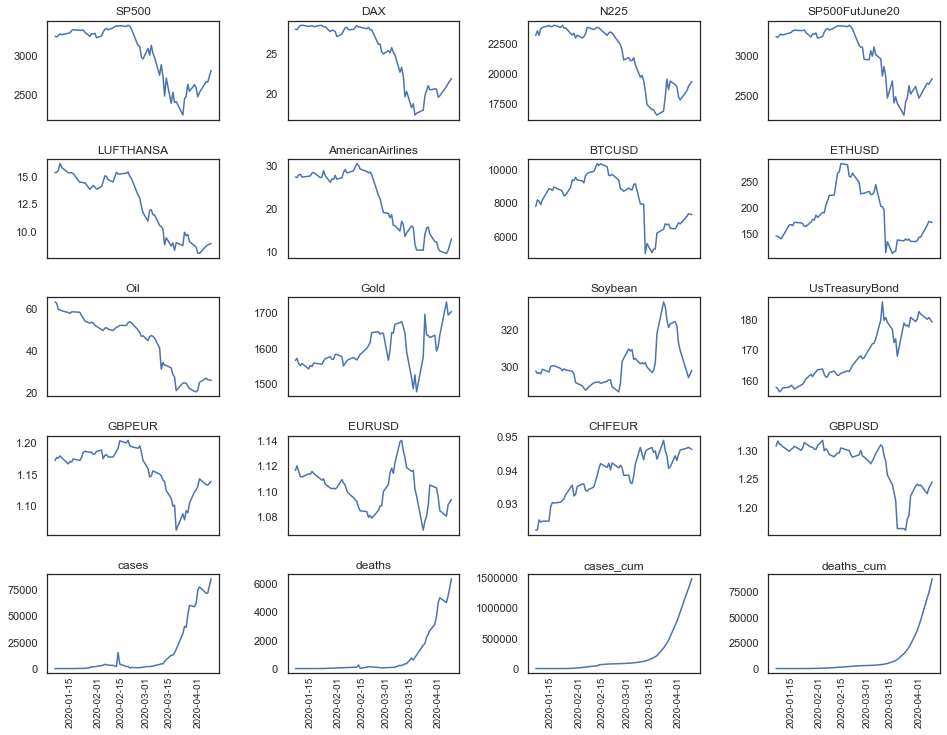

In [54]:
# First we create two separate charts
from pandas.plotting import register_matplotlib_converters
f = 0
x = df_covid["Date"]
list_length = len(col_list)
nrows = 5
ncols = int(round(list_length / nrows, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(nrows):
    for j in range(ncols):
        assetname = col_list[f]
        y = df_covid[assetname]
        f += 1
        ax[i, j].plot(x, y)
        ax[i, j].set_title(assetname)
        ax[i, j].tick_params(axis="x", rotation=90, labelsize=10, length=0)
plt.show()

In [70]:
# Plotting a diagonal correlation matrix
sns.set(style="white")

# Compute the correlation matrix
df = pd.DataFrame(df_covid, columns=col_list)
corr = df.corr()
corr

,SP500,DAX,N225,SP500FutJune20,LUFTHANSA,AmericanAirlines,BTCUSD,ETHUSD,Oil,Gold,Soybean,UsTreasuryBond,GBPEUR,EURUSD,CHFEUR,GBPUSD,cases,deaths,cases_cum,deaths_cum
SP500,1.000000,0.988821,0.971132,0.973097,0.951877,0.941584,0.886534,0.593647,0.922703,-0.267753,-0.715468,-0.859113,0.909512,0.055667,-0.714314,0.847746,-0.658713,-0.609266,-0.589207,-0.532243
DAX,0.988821,1.000000,0.989418,0.973819,0.964113,0.942167,0.878168,0.549337,0.942081,-0.250512,-0.660989,-0.870229,0.903585,0.069853,-0.764981,0.849375,-0.658308,-0.612979,-0.601012,-0.544996
N225,0.971132,0.989418,1.000000,0.966059,0.960996,0.946840,0.861402,0.515890,0.923612,-0.259980,-0.632057,-0.874739,0.891021,0.029607,-0.767461,0.821493,-0.628901,-0.590810,-0.587535,-0.534458
SP500FutJune20,0.973097,0.973819,0.966059,1.000000,0.948201,0.938362,0.870850,0.587364,0.938035,-0.266526,-0.737032,-0.857934,0.919857,0.090713,-0.701187,0.871686,-0.699421,-0.649250,-0.628822,-0.573278
LUFTHANSA,0.951877,0.964113,0.960996,0.948201,1.000000,0.974603,0.807599,0.472676,0.946341,-0.385298,-0.642129,-0.931849,0.837059,0.031293,-0.787187,0.773259,-0.711511,-0.681411,-0.681982,-0.631806
AmericanAirlines,0.941584,0.942167,0.946840,0.938362,0.974603,1.000000,0.786155,0.450085,0.908330,-0.443684,-0.674337,-0.913785,0.835598,0.020148,-0.736424,0.766666,-0.703659,-0.681664,-0.693152,-0.646168
BTCUSD,0.886534,0.878168,0.861402,0.870850,0.807599,0.786155,1.000000,0.825635,0.750369,-0.037857,-0.592155,-0.658316,0.842171,-0.145676,-0.452502,0.703590,-0.530645,-0.494481,-0.465914,-0.425987
ETHUSD,0.593647,0.549337,0.515890,0.587364,0.472676,0.450085,0.825635,1.000000,0.433480,0.223304,-0.474856,-0.272292,0.644170,-0.254167,0.021935,0.475460,-0.390612,-0.359787,-0.290711,-0.277216
Oil,0.922703,0.942081,0.923612,0.938035,0.946341,0.908330,0.750369,0.433480,1.000000,-0.363327,-0.668870,-0.907440,0.853757,0.192539,-0.811596,0.855111,-0.792996,-0.739229,-0.724281,-0.666224
Gold,-0.267753,-0.250512,-0.259980,-0.266526,-0.385298,-0.443684,-0.037857,0.223304,-0.363327,1.000000,0.200376,0.599894,-0.099356,-0.170292,0.482549,-0.160669,0.455729,0.475679,0.543418,0.536927


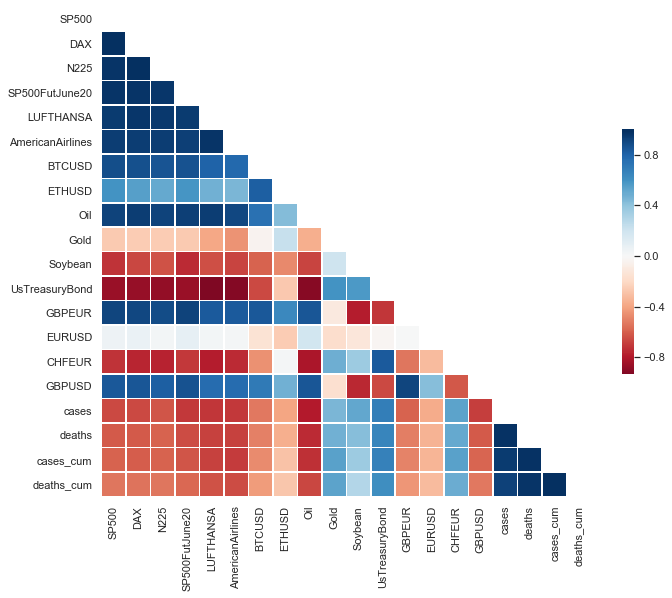

In [69]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "RdBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)